In [22]:
import numpy as np
import pandas as pd

## LINEAR_REGRESSION

In [16]:
def generate_dataset_simple(beta, n, std_dev, alpha):
  # Generate x as an array of `n` samples which can take a value between 0 and 10
  X = np.random.random(n) * 10
  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  # Calculate `y` according to the equation discussed
  y = alpha + X * beta + e
  return X, y

In [66]:
X, y = generate_dataset_simple(beta=2, n=200, std_dev=4, alpha=2)
data = pd.DataFrame(
    {
    'X' : X,
    'y' : y
    }
)


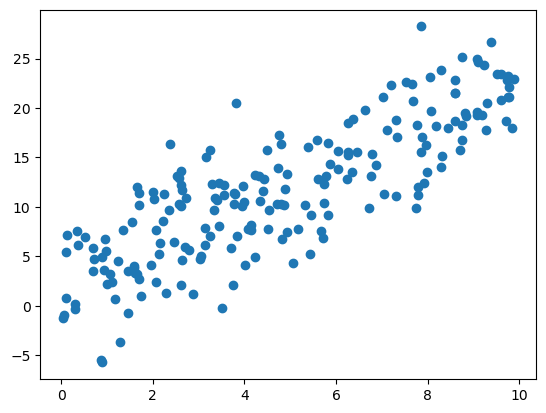

In [67]:
from matplotlib import pyplot as plt
plt.scatter(data['X'], data['y'])

plt.show()

In [68]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression(fit_intercept=True).fit(X=data['X'].values.reshape(-1, 1), y=data['y'])

In [69]:
linear_regression_model.coef_

array([2.00625953])

In [70]:
linear_regression_model.intercept_

2.042731393516691

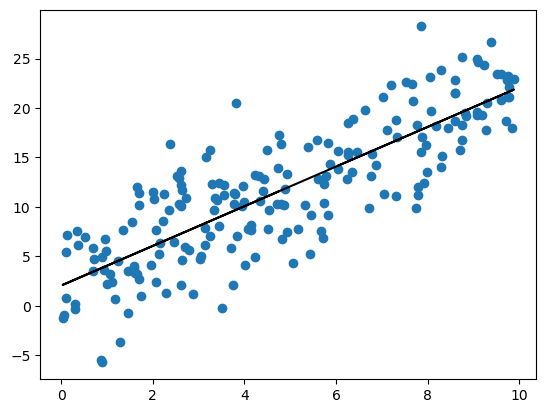

In [74]:
from matplotlib import pyplot as plt
plt.scatter(data['X'], data['y'])
plt.plot(X, linear_regression_model.predict(data['X'].values.reshape(-1, 1)), color='k')

plt.show()

plt.show()

## LOGISTIC_REGRESSION

In [119]:
def generate_dataset_simple(beta, n, std_dev, alpha):
  # Generate x as an array of `n` samples which can take a value between 0 and 10
  X = np.random.uniform(-1, 1, n) * 10 
  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  # Calculate `y` according to the equation discussed
  z = alpha + X * beta + e
  pr = 1/(1+np.exp(-z)) 
  y = pr > 0.5 
  # y = np.random.binomial(200, pr, 200)
  return X, y

In [120]:
X, y = generate_dataset_simple(beta=2, n=40, std_dev=4, alpha=0)
data = pd.DataFrame(
    {
    'X' : X,
    'y' : y
    }
)


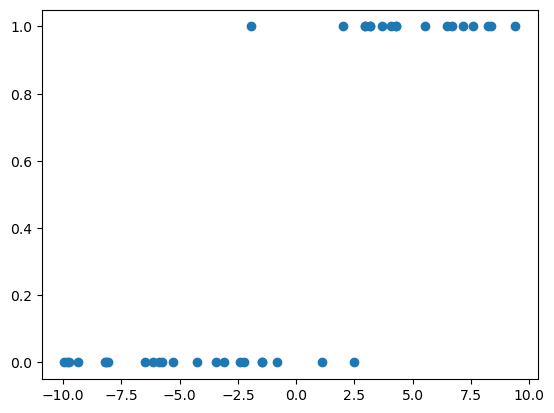

In [121]:
from matplotlib import pyplot as plt
plt.scatter(data['X'], data['y'])

plt.show()

In [128]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(fit_intercept=True).fit(X=data['X'].values.reshape(-1, 1), y=data['y'])

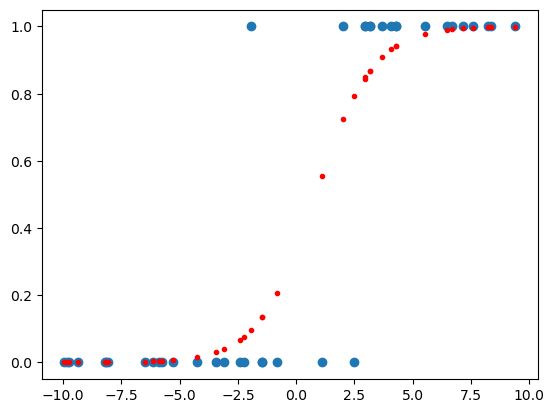

In [143]:
from turtle import color
from matplotlib import pyplot as plt
plt.scatter(data['X'], data['y'])
plt.plot(data['X'], logistic_regression_model.predict_proba(data['X'].values.reshape(-1, 1))[:,1], '.', label='Logistic regr', color='red')    


plt.show()


In [148]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [172]:
features, clusters = make_blobs(n_samples = 2000,
                  n_features = 2, 
                  centers = 5,
                  cluster_std = 2,
                  shuffle = True)

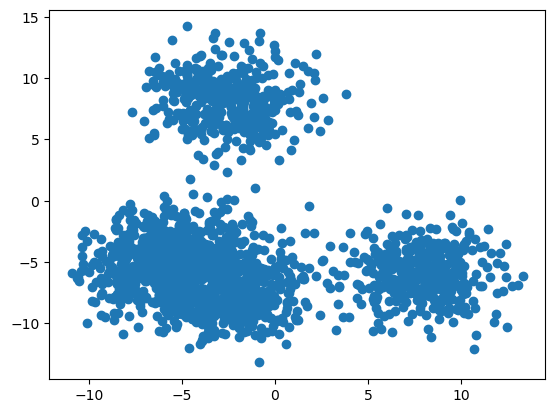

In [173]:
plt.scatter(features[:,0], features[:,1])
plt.show()

In [174]:
#Initialize the class object
kmeans = KMeans(n_clusters=5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(features)

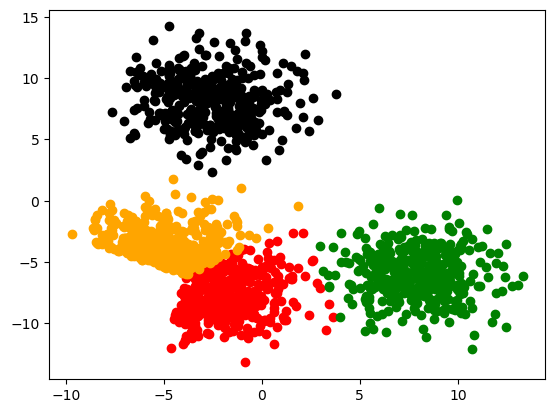

In [175]:
#filter rows of original data
filtered_label0 = features[label == 0]
filtered_label1 = features[label == 1]
filtered_label2 = features[label == 2]
filtered_label3 = features[label == 3]

 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'orange')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'green')

plt.show()